In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense, Input
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, precision_score
import sklearn
import random
import sklearn.feature_selection
import sklearn.metrics
import pandas as pd
import sklearn.model_selection
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
random.seed(13)
np.random.seed(14)
tf.random.set_seed(15)
# Load all the packages and set seeds

In [2]:
# Start of training the CLASSIFICATION model

# data to be normalised
scalableData = ["u10","v10","mx2t","mn2t","tcc","t2","msl","t","q","u","v","z"]
# data not used as an input to the NN
notInput = ["year", "SPI", "grid_ID", "month", "Drought", "msl", "v10", "u10", "v"]

# read in the data
data = pd.read_csv('Climate_SPI.csv')
# set the Drought to either be 0 or 1 depending on whether it is below -1
data['Drought'] = (data['SPI'] <= -1).astype('int')

# normalise the month
data['sin'] = np.sin(2 * np.pi * (data['month'] - 1) / 12)
data['cos'] = np.sin(2 * np.pi * (data['month'] - 1) / 12)

# normalise the remianing data (pre-processing)
scaler = MinMaxScaler(feature_range=(0, 1))
data[scalableData] = scaler.fit_transform(data[scalableData])
# split the dataset
trainingData, remainingData = sklearn.model_selection.train_test_split(data, test_size=0.2, random_state=3)
validationData, testingData = sklearn.model_selection.train_test_split(remainingData, test_size=0.5, random_state=3)
# remove irrelevant columns and extract the expected output for that entry
trainInput = trainingData.drop(columns=notInput)
trainExpected = trainingData['Drought']

validationInput = validationData.drop(columns=notInput)
validationExpected = validationData['Drought']

testInput = testingData.drop(columns=notInput)
testExpected = testingData['Drought']

In [3]:
#Inputs and targets
x = np.array(trainInput) #input
t = np.array(trainExpected) #targets

#Creating the neural network with TF
nnet = Sequential()
nnet.add(Input(shape=(10,)))
nnet.add(Dense(20, activation='relu'))
nnet.add(Dense(20, activation='relu'))
nnet.add(Dense(1, activation='sigmoid'))
nnet.compile(optimizer=SGD(learning_rate=0.05), loss='binary_crossentropy', metrics=['binary_accuracy'])

#Training the neural network
metrics = nnet.fit(x, t, batch_size=32, epochs=300, validation_data=(validationInput, validationExpected))
# save the nn
nnet.save('classification.keras')

Epoch 1/300
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.7885 - loss: 0.5005 - val_binary_accuracy: 0.8591 - val_loss: 0.3994
Epoch 2/300
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8555 - loss: 0.4049 - val_binary_accuracy: 0.8591 - val_loss: 0.3913
Epoch 3/300
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8557 - loss: 0.3948 - val_binary_accuracy: 0.8591 - val_loss: 0.3759
Epoch 4/300
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8555 - loss: 0.3767 - val_binary_accuracy: 0.8591 - val_loss: 0.3553
Epoch 5/300
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.8562 - loss: 0.3558 - val_binary_accuracy: 0.8618 - val_loss: 0.3443
Epoch 6/300
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.8554 - loss: 0.3467 - val_binary_accuracy: 0.8631 - val_loss: 0.3396
Epoch 7/300
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.8572 - loss: 0.3429 - val_binary_accuracy: 0.8631 - val_loss: 0.3364

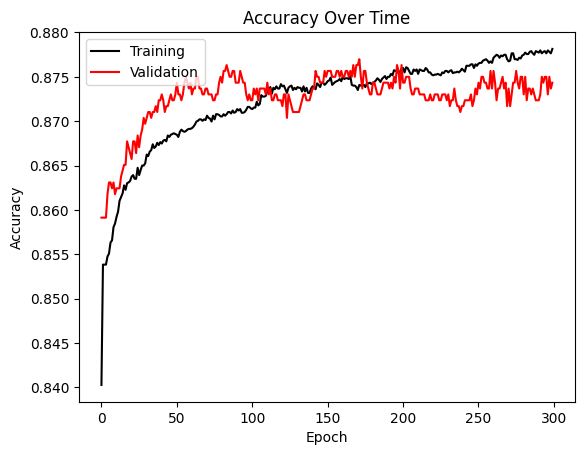

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Balanced Accuracy (Test Set): 0.6772934147235823
Precision (Test Set): 0.6560509554140127
Confusion Matrix (Test Set):
[[1199   54]
 [ 156  103]]


In [5]:
# Plot training and validation accuracy values
plt.plot(metrics.history['binary_accuracy'], label='Training', color='black')
plt.plot(metrics.history['val_binary_accuracy'], label='Validation', color='red')
plt.title('Accuracy Over Time')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# get the results from the NN
results = nnet.predict(testInput)
# catagorise the results
predictions = (results > 0.4).astype('int32')
# print out relevant info
print(f'Balanced Accuracy (Test Set): {balanced_accuracy_score(testExpected, predictions)}')
print(f'Precision (Test Set): {precision_score(testExpected, predictions)}')
print(f'Confusion Matrix (Test Set):\n{confusion_matrix(testExpected, predictions)}')

In [8]:
# REGRESSION ----- put R after variables meaning regression
# input that is excluded from the NN
notInputR = ["year", "SPI", "grid_ID", "month", "msl", "v10", "v"]

# read in the data
dataR = pd.read_csv('Climate_SPI.csv')

# normalise the month
dataR['sin'] = np.sin(2 * np.pi * (dataR['month'] - 1) / 12)
dataR['cos'] = np.sin(2 * np.pi * (dataR['month'] - 1) / 12)

# normalise the remianing data
scalerR = MinMaxScaler(feature_range=(0, 1))
dataR[scalableData] = scaler.fit_transform(dataR[scalableData])
# split the dataset
trainingDataR, remainingDataR = sklearn.model_selection.train_test_split(dataR, test_size=0.2, random_state=5)
validationDataR, testingDataR = sklearn.model_selection.train_test_split(remainingDataR, test_size=0.5, random_state=5)
# remove irrelevant columns and extract the expected output for that entry
trainInputR = trainingDataR.drop(columns=notInputR)
trainExpectedR = trainingDataR['SPI']

validationInputR = validationDataR.drop(columns=notInputR)
validationExpectedR = validationDataR['SPI']

testInputR = testingDataR.drop(columns=notInputR)
testExpectedR = testingDataR['SPI']

In [9]:
#Inputs and targets
xR = np.array(trainInputR) #input
tR = np.array(trainExpectedR) #targets

#Creating the neural network with TF
nnetR = Sequential()
nnetR.add(Input(shape=(11,)))
nnetR.add(Dense(20, activation='relu'))
nnetR.add(Dense(20, activation='relu'))
nnetR.add(Dense(1, activation='linear'))
nnetR.compile(optimizer=SGD(learning_rate=0.1), loss='mean_squared_error')

#Training the neural network
trained = nnetR.fit(xR, tR, batch_size=64, epochs=300, validation_data=(validationInputR, validationExpectedR))
# Save the NN
nnetR.save('regression.keras')

Epoch 1/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8587 - val_loss: 0.6884
Epoch 2/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6791 - val_loss: 0.6319
Epoch 3/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6463 - val_loss: 0.6163
Epoch 4/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6297 - val_loss: 0.6024
Epoch 5/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6151 - val_loss: 0.5974
Epoch 6/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6053 - val_loss: 0.5914
Epoch 7/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5944 - val_loss: 0.5840
Epoch 8/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5868 - val_loss: 0.5830
Epoch 9/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5792 - val_loss: 0.5712
Epoch 10/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5722 - val_loss: 0.5659
Epoch 11/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5657 - val_loss: 0.5701
Epoch 12/300
189/189 ━━━━━━━━━━━━━━━━━━━━

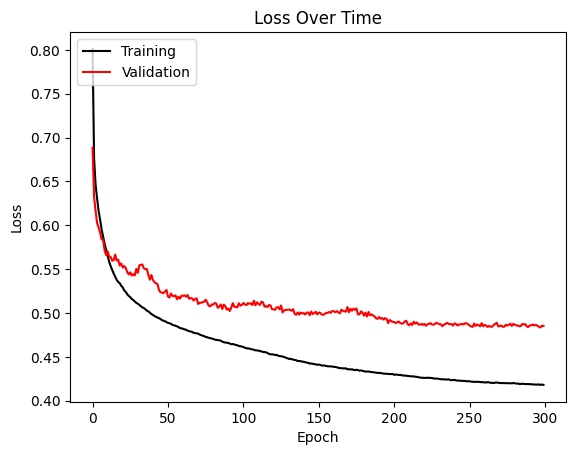

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


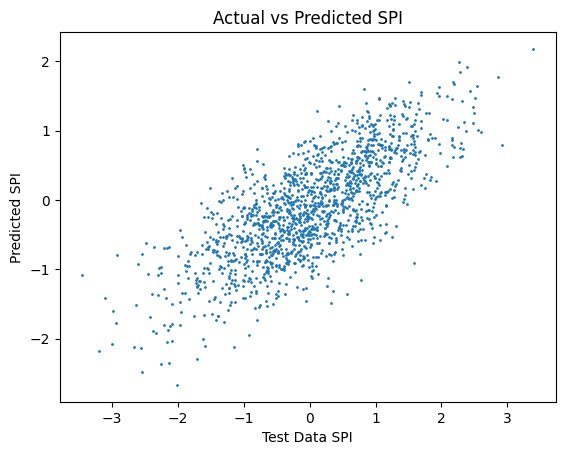

Mean Absolute Error (Test Set): 0.5344821900991534
Pearson Correlation Cofficient (Test Set): 0.7531253433284061


In [10]:
# plot the loss against the number of epochs
plt.plot(trained.history['loss'], label='Training', color='black')
plt.plot(trained.history['val_loss'], label='Validation', color='red')
plt.title('Loss Over Time')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# get the results from the NN
resultsR = nnetR.predict(testInputR)
# plot the SPI predicted by the NN against the recorded SPI
plt.scatter(testExpectedR, resultsR, s=1)
plt.xlabel('Test Data SPI')
plt.ylabel('Predicted SPI')
plt.title('Actual vs Predicted SPI')
plt.show()

print(f'Mean Absolute Error (Test Set): {sklearn.metrics.mean_absolute_error(testExpectedR, resultsR)}')
print(f'Pearson Correlation Cofficient (Test Set): {sklearn.feature_selection.r_regression(resultsR, testExpectedR)[0]}')

In [11]:
# LOAD THE CLASSIFICATION MODEL AND USE IT TO MAKE PREDICITIONS ON NEW DATA

# read in the data
data = pd.read_csv('Fake_Climate_SPI6.csv')

# data to be normalised
scalableData = ["u10","v10","mx2t","mn2t","tcc","t2","msl","t","q","u","v","z"]
# data not used as an input to the NN
notInput = ["year", "SPI", "grid_ID", "month", "Drought", "msl", "v10", "u10", "v"]

# set the Drought to either be 0 or 1 depending on whether it is below -1
data['Drought'] = (data['SPI'] <= -1).astype('int')

# normalise the month
data['sin'] = np.sin(2 * np.pi * (data['month'] - 1) / 12)
data['cos'] = np.sin(2 * np.pi * (data['month'] - 1) / 12)

# normalise the remaining data
scaler = MinMaxScaler(feature_range=(0, 1))
data[scalableData] = scaler.fit_transform(data[scalableData])

# split up the data into input and expected output
inputData = data.drop(columns=notInput)
expected = data['Drought']

# load the saved model
classificationModel = load_model('classification.keras')

# make predictions on the data
classifications = classificationModel.predict(inputData)

# catagorise the results
predictions = (classifications > 0.43).astype('int32')

# print out relevant info
print(f'Confusion Matrix:\n{confusion_matrix(expected, predictions)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(expected, predictions)}')
print(f'Precision: {precision_score(expected, predictions)}')
print(f'Number of samples: {inputData.shape[0]}')
print(f'Model\'s predictor set: {list(inputData.keys())}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
[[1595  121]
 [ 184  116]]
Balanced Accuracy: 0.6580769230769231
Precision: 0.48945147679324896
Number of samples: 2016
Model's predictor set: ['mx2t', 'mn2t', 'tcc', 't2', 't', 'q', 'u', 'z', 'sin', 'cos']


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


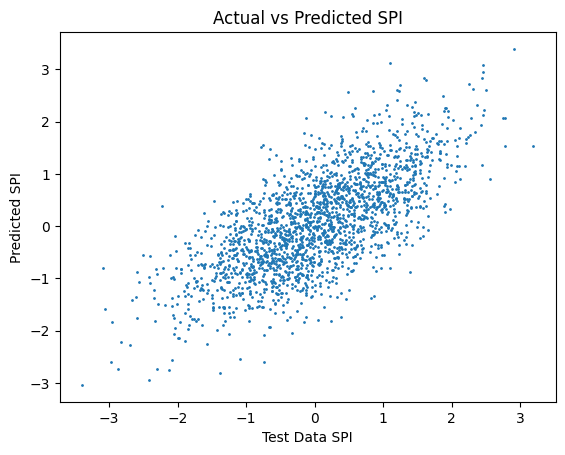

Mean Absolute Error: 0.6011191411060768
Pearson Correlation Cofficient: 0.6968478979154661
Number of samples: 2016
Model's predictor set: ['u10', 'mx2t', 'mn2t', 'tcc', 't2', 't', 'q', 'u', 'z', 'sin', 'cos']


In [12]:
# LOAD THE REGRESSION MODEL AND USE IT TO MAKE PREDICITIONS ON NEW DATA

# read in the data
data = pd.read_csv('Fake_Climate_SPI6.csv')

# input that is excluded from the NN
notInput = ["year", "SPI", "grid_ID", "month", "msl", "v10", "v"]

# normalise the month
data['sin'] = np.sin(2 * np.pi * (data['month'] - 1) / 12)
data['cos'] = np.sin(2 * np.pi * (data['month'] - 1) / 12)

# normalise the remianing data
scaler = MinMaxScaler(feature_range=(0, 1))
data[scalableData] = scaler.fit_transform(data[scalableData])

# remove irrelevant columns and extract the expected output for that entry
inputData = data.drop(columns=notInput)
expected = data['SPI']

# load the saved model
regressionModel = load_model('regression.keras')

# make predictions on the data
predictedSPI = regressionModel.predict(inputData)

# create a scatter plot of the data
plt.scatter(expected, predictedSPI, s=1)
plt.xlabel('Test Data SPI')
plt.ylabel('Predicted SPI')
plt.title('Actual vs Predicted SPI')
plt.show()

print(f'Mean Absolute Error: {sklearn.metrics.mean_absolute_error(expected, predictedSPI)}')
print(f'Pearson Correlation Cofficient: {sklearn.feature_selection.r_regression(predictedSPI, expected)[0]}')
print(f'Number of samples: {inputData.shape[0]}')
print(f'Model\'s predictor set: {list(inputData.keys())}')